In [ ]:
# Colab and Data setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Mount Google Drive if dataset is there
from google.colab import drive
drive.mount('/content/drive')

# Load your CSV (adjust path/filename as needed)
df = pd.read_csv('/content/drive/MyDrive/real estate.csv')

Mounted at /content/drive


In [ ]:
# Quick checks
print(df.shape)
print(df.dtypes)
df.head()

(14177, 22)
property_id                 int64
address                    object
neighbourhood              object
ward                       object
assessed_value              int64
garage                     object
latitude                  float64
longitude                 float64
lot_size_sf               float64
total_living_area_sf      float64
year_built                  int64
land_value                  int64
improvement_value           int64
bedrooms                    int64
bathrooms                 float64
basement                   object
property_type              object
property_use               object
building_age                int64
price_per_sqft            float64
land_to_building_ratio    float64
annual_tax                  int64
dtype: object


,property_id,address,neighbourhood,ward,assessed_value,garage,latitude,longitude,lot_size_sf,total_living_area_sf,...,improvement_value,bedrooms,bathrooms,basement,property_type,property_use,building_age,price_per_sqft,land_to_building_ratio,annual_tax
0,10000000,"18230 107A STREET NW Edmonton, AB",CHAMBERY,tastawiyiniwak Ward,428500,Y,53.644496,-113.510582,395.758,137.0,...,278525,4,2.0,Finished,Duplex,Rental Property,22,3127.737226,2.888745,5142
1,10000001,"18234 107A STREET NW Edmonton, AB",CHAMBERY,tastawiyiniwak Ward,438500,Y,53.644589,-113.510570,364.863,136.9,...,285025,4,2.0,NaN,Single Family Home,Residential,22,3203.067933,2.665179,5262
2,10000002,"18238 107A STREET NW Edmonton, AB",CHAMBERY,tastawiyiniwak Ward,439000,Y,53.644682,-113.510559,364.866,151.4,...,285350,4,2.0,Finished,Row Housing,Investment Property,22,2899.603699,2.409947,5268
3,10000003,"18242 107A STREET NW Edmonton, AB",CHAMBERY,tastawiyiniwak Ward,440000,Y,53.644785,-113.510550,424.504,136.8,...,286000,4,2.0,Unfinished,Single Family Home,Residential,22,3216.374269,3.103099,5280
4,10000004,"18203 107 STREET NW Edmonton, AB",CHAMBERY,tastawiyiniwak Ward,487500,Y,53.644628,-113.508435,551.298,133.3,...,316875,4,2.5,Partially Finished,Single Family Home,Rental Property,22,3657.164291,4.135769,5850


property_id                  0
address                      0
neighbourhood                0
ward                         0
assessed_value               0
garage                       0
latitude                     0
longitude                    0
lot_size_sf                  0
total_living_area_sf         0
year_built                   0
land_value                   0
improvement_value            0
bedrooms                     0
bathrooms                    0
basement                  2128
property_type                0
property_use                 0
building_age                 0
price_per_sqft               0
land_to_building_ratio       0
annual_tax                   0
dtype: int64


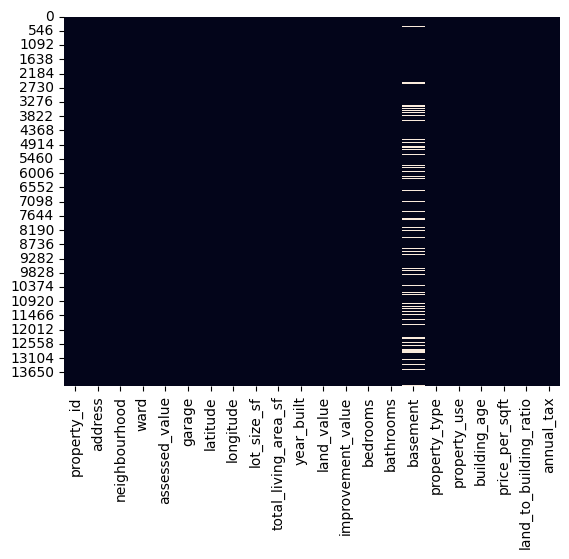

In [ ]:
# Null values per column
print(df.isnull().sum())

# Visualize missingness
sns.heatmap(df.isnull(), cbar=False)
plt.show()

# Drop duplicates (based on property_id/address if unique)
df = df.drop_duplicates(subset=['property_id', 'address'])

        property_id  assessed_value      latitude     longitude   lot_size_sf  \
count  1.417700e+04    1.417700e+04  14177.000000  14177.000000  14177.000000   
mean   1.000651e+07    3.476147e+05     53.518012   -113.510726    985.340281   
std    1.311033e+05    2.200800e+05      0.071798      0.077405   1442.805557   
min    1.001601e+06    4.000000e+03     53.415317   -113.696792      0.144000   
25%    1.000412e+07    1.770000e+05     53.455027   -113.549023    258.200000   
50%    1.000845e+07    3.845000e+05     53.519781   -113.511140    395.868000   
75%    1.001260e+07    4.890000e+05     53.584526   -113.464687    592.698000   
max    1.001696e+07    1.085000e+06     53.645303   -113.333474   9000.000000   

       total_living_area_sf    year_built     land_value  improvement_value  \
count          14177.000000  14177.000000   14177.000000       14177.000000   
mean             129.259722   1997.830782  121665.154828      225949.573252   
std               94.675069     1

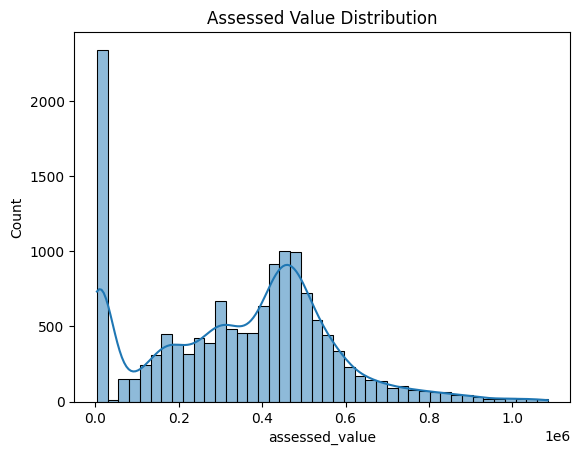

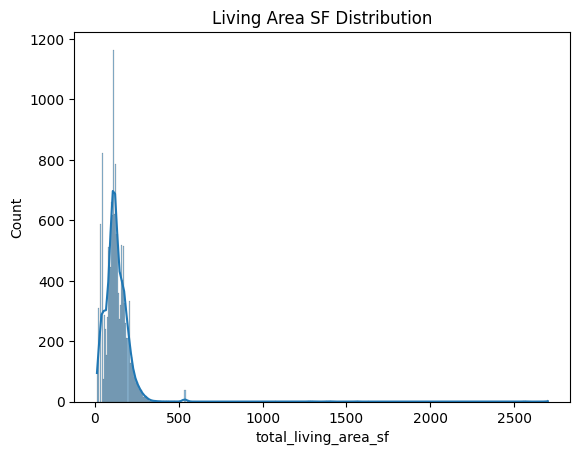

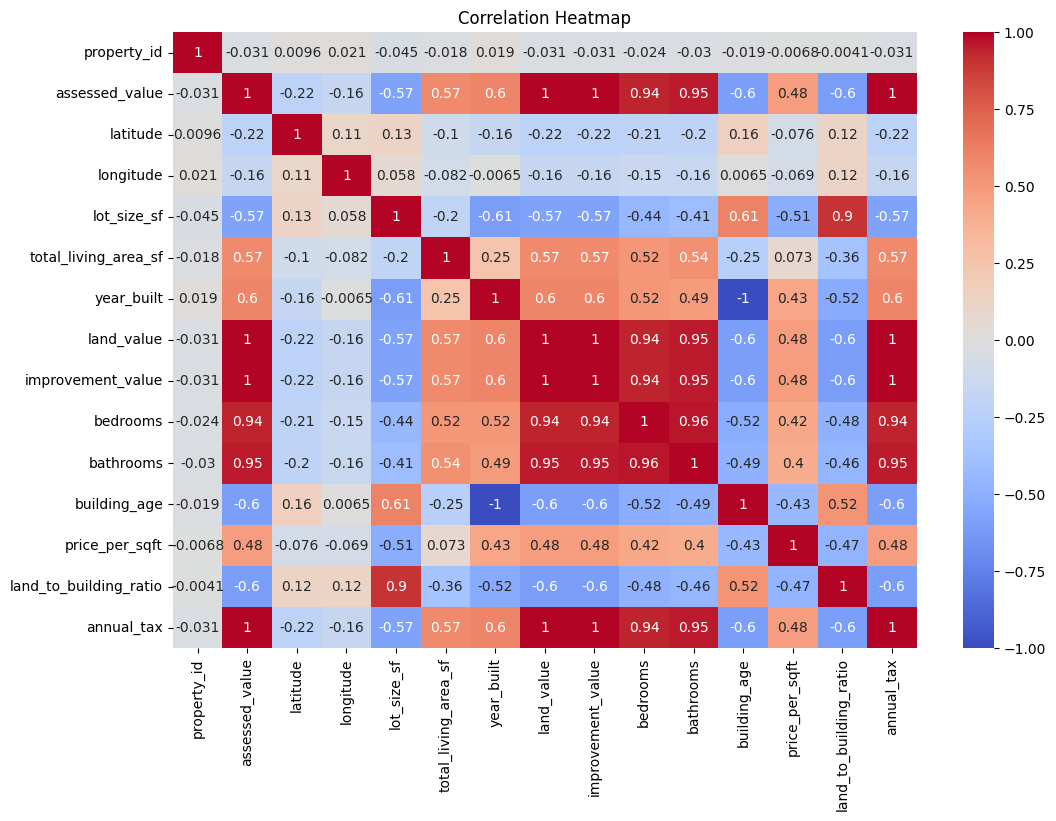

In [ ]:
# Describe numeric columns
print(df.describe())

# Value counts for categorical features
print(df['neighbourhood'].value_counts().head())
print(df['property_type'].value_counts())

# Distribution plots
sns.histplot(df['assessed_value'], kde=True)
plt.title('Assessed Value Distribution')
plt.show()

sns.histplot(df['total_living_area_sf'], kde=True)
plt.title('Living Area SF Distribution')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

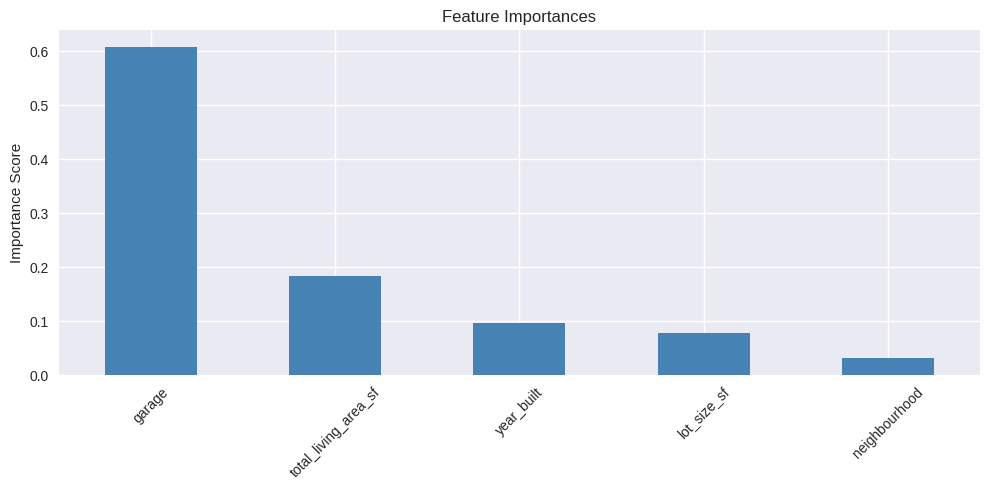

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

valid_features = [
    'neighbourhood',
    'garage',
    'lot_size_sf',
    'total_living_area_sf',
    'year_built'
]
target = 'assessed_value'

# Drop rows with missing values in selected columns
df_clean = df[valid_features + [target]].dropna()

# One-hot encode categorical features
df_encoded = pd.get_dummies(df_clean, columns=['neighbourhood', 'garage'], drop_first=True)

# Split features and target
X = df_encoded.drop(columns=[target])
y = df_encoded[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
feat_names = X_train.columns

# Convert to Series
feat_imp = pd.Series(importances, index=feat_names)

# Group neighbourhood & garage columns under their base feature names
def group_feature(name):
    if name.startswith('neighbourhood_'):
        return 'neighbourhood'
    elif name.startswith('garage_'):
        return 'garage'
    else:
        return name

# Apply grouping
grouped_feat_imp = feat_imp.groupby(feat_imp.index.map(group_feature)).sum().sort_values(ascending=False)

# Plot clean chart
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
grouped_feat_imp.plot(kind='bar', color='steelblue')
plt.title('Feature Importances')
plt.ylabel('Importance Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(
    rf, # Corrected variable name from rf_cv to rf
    X_train,
    y_train,
    cv=5,
    scoring=['neg_mean_absolute_error', 'neg_root_mean_squared_error', 'r2'],
    return_train_score=True
)

# Convert negative values to positive
print("Mean MAE:", -cv_results['test_neg_mean_absolute_error'].mean())
print("Mean RMSE:", -cv_results['test_neg_root_mean_squared_error'].mean()) # Corrected sign here too
print("Mean R²:", cv_results['test_r2'].mean())

Mean MAE: 20742.536555887127
Mean RMSE: 39266.369530828124
Mean R²: 0.9678300299149057


In [ ]:
# Import additional libraries for comprehensive analysis
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [ ]:
# Define multiple models to compare
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'SVR': SVR(kernel='rbf', C=1.0)
}

# Train all models and collect results
results = {}
predictions = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Store predictions
    predictions[name] = y_pred

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred) * 100

    results[name] = {
        'MAE': mae,
        'RMSE': rmse,
        'R2_Score': r2,
        'MAPE': mape
    }

    print(f"{name} - R2: {r2:.4f}, MAE: ${mae:,.0f}, RMSE: ${rmse:,.0f}")

print("\n" + "="*60)
print("MODEL TRAINING COMPLETED!")
print("="*60)

Training Random Forest...
Random Forest - R2: 0.9629, MAE: $21,995, RMSE: $42,907
Training Gradient Boosting...
Gradient Boosting - R2: 0.9551, MAE: $29,714, RMSE: $47,247
Training Linear Regression...
Linear Regression - R2: 0.8375, MAE: $59,265, RMSE: $89,846
Training Ridge Regression...
Ridge Regression - R2: 0.8351, MAE: $59,573, RMSE: $90,509
Training Lasso Regression...
Lasso Regression - R2: 0.8373, MAE: $59,304, RMSE: $89,917
Training Decision Tree...
Decision Tree - R2: 0.9521, MAE: $26,130, RMSE: $48,766
Training SVR...
SVR - R2: -0.0191, MAE: $180,879, RMSE: $225,032

MODEL TRAINING COMPLETED!


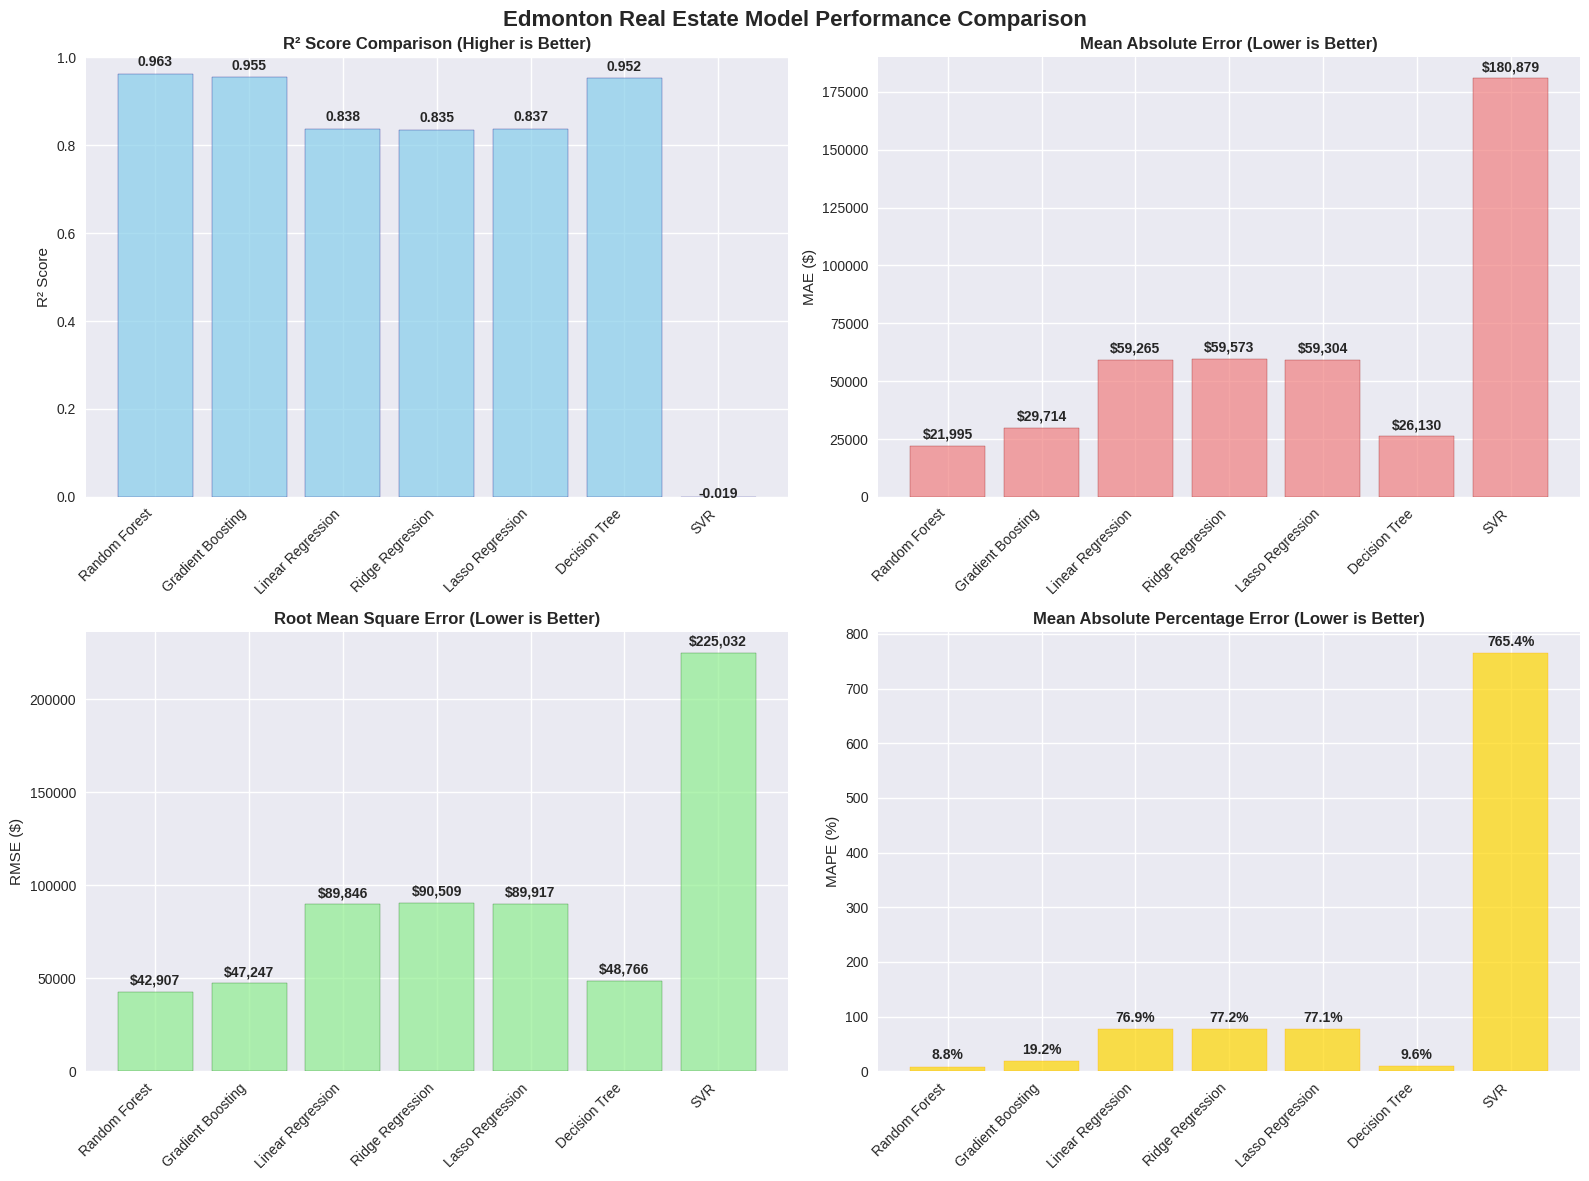

In [ ]:
# Create comprehensive comparison charts
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Edmonton Real Estate Model Performance Comparison', fontsize=16, fontweight='bold')

# Convert results to DataFrame for easier plotting
results_df = pd.DataFrame(results).T

# 1. R2 Score Comparison
ax1 = axes[0, 0]
bars1 = ax1.bar(results_df.index, results_df['R2_Score'], color='skyblue', edgecolor='navy', alpha=0.7)
ax1.set_title('R² Score Comparison (Higher is Better)', fontweight='bold')
ax1.set_ylabel('R² Score')
ax1.set_ylim(0, 1)
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')
# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.3f}', ha='center', va='bottom', fontweight='bold')

# 2. MAE Comparison
ax2 = axes[0, 1]
bars2 = ax2.bar(results_df.index, results_df['MAE'], color='lightcoral', edgecolor='darkred', alpha=0.7)
ax2.set_title('Mean Absolute Error (Lower is Better)', fontweight='bold')
ax2.set_ylabel('MAE ($)')
plt.setp(ax2.get_xticklabels(), rotation=45, ha='right')
# Add value labels on bars
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + max(results_df['MAE'])*0.01,
             f'${height:,.0f}', ha='center', va='bottom', fontweight='bold')

# 3. RMSE Comparison
ax3 = axes[1, 0]
bars3 = ax3.bar(results_df.index, results_df['RMSE'], color='lightgreen', edgecolor='darkgreen', alpha=0.7)
ax3.set_title('Root Mean Square Error (Lower is Better)', fontweight='bold')
ax3.set_ylabel('RMSE ($)')
plt.setp(ax3.get_xticklabels(), rotation=45, ha='right')
# Add value labels on bars
for bar in bars3:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + max(results_df['RMSE'])*0.01,
             f'${height:,.0f}', ha='center', va='bottom', fontweight='bold')

# 4. MAPE Comparison
ax4 = axes[1, 1]
bars4 = ax4.bar(results_df.index, results_df['MAPE'], color='gold', edgecolor='orange', alpha=0.7)
ax4.set_title('Mean Absolute Percentage Error (Lower is Better)', fontweight='bold')
ax4.set_ylabel('MAPE (%)')
plt.setp(ax4.get_xticklabels(), rotation=45, ha='right')
# Add value labels on bars
for bar in bars4:
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + max(results_df['MAPE'])*0.01,
             f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
# Find the best model based on R2 score
best_model_name = results_df['R2_Score'].idxmax()
best_model = models[best_model_name]
best_predictions = predictions[best_model_name]

print(f"🏆 BEST MODEL: {best_model_name}")
print(f"R² Score: {results[best_model_name]['R2_Score']:.4f}")
print(f"MAE: ${results[best_model_name]['MAE']:,.0f}")
print(f"RMSE: ${results[best_model_name]['RMSE']:,.0f}")
print(f"MAPE: {results[best_model_name]['MAPE']:.2f}%")

🏆 BEST MODEL: Random Forest
R² Score: 0.9629
MAE: $21,995
RMSE: $42,907
MAPE: 8.77%


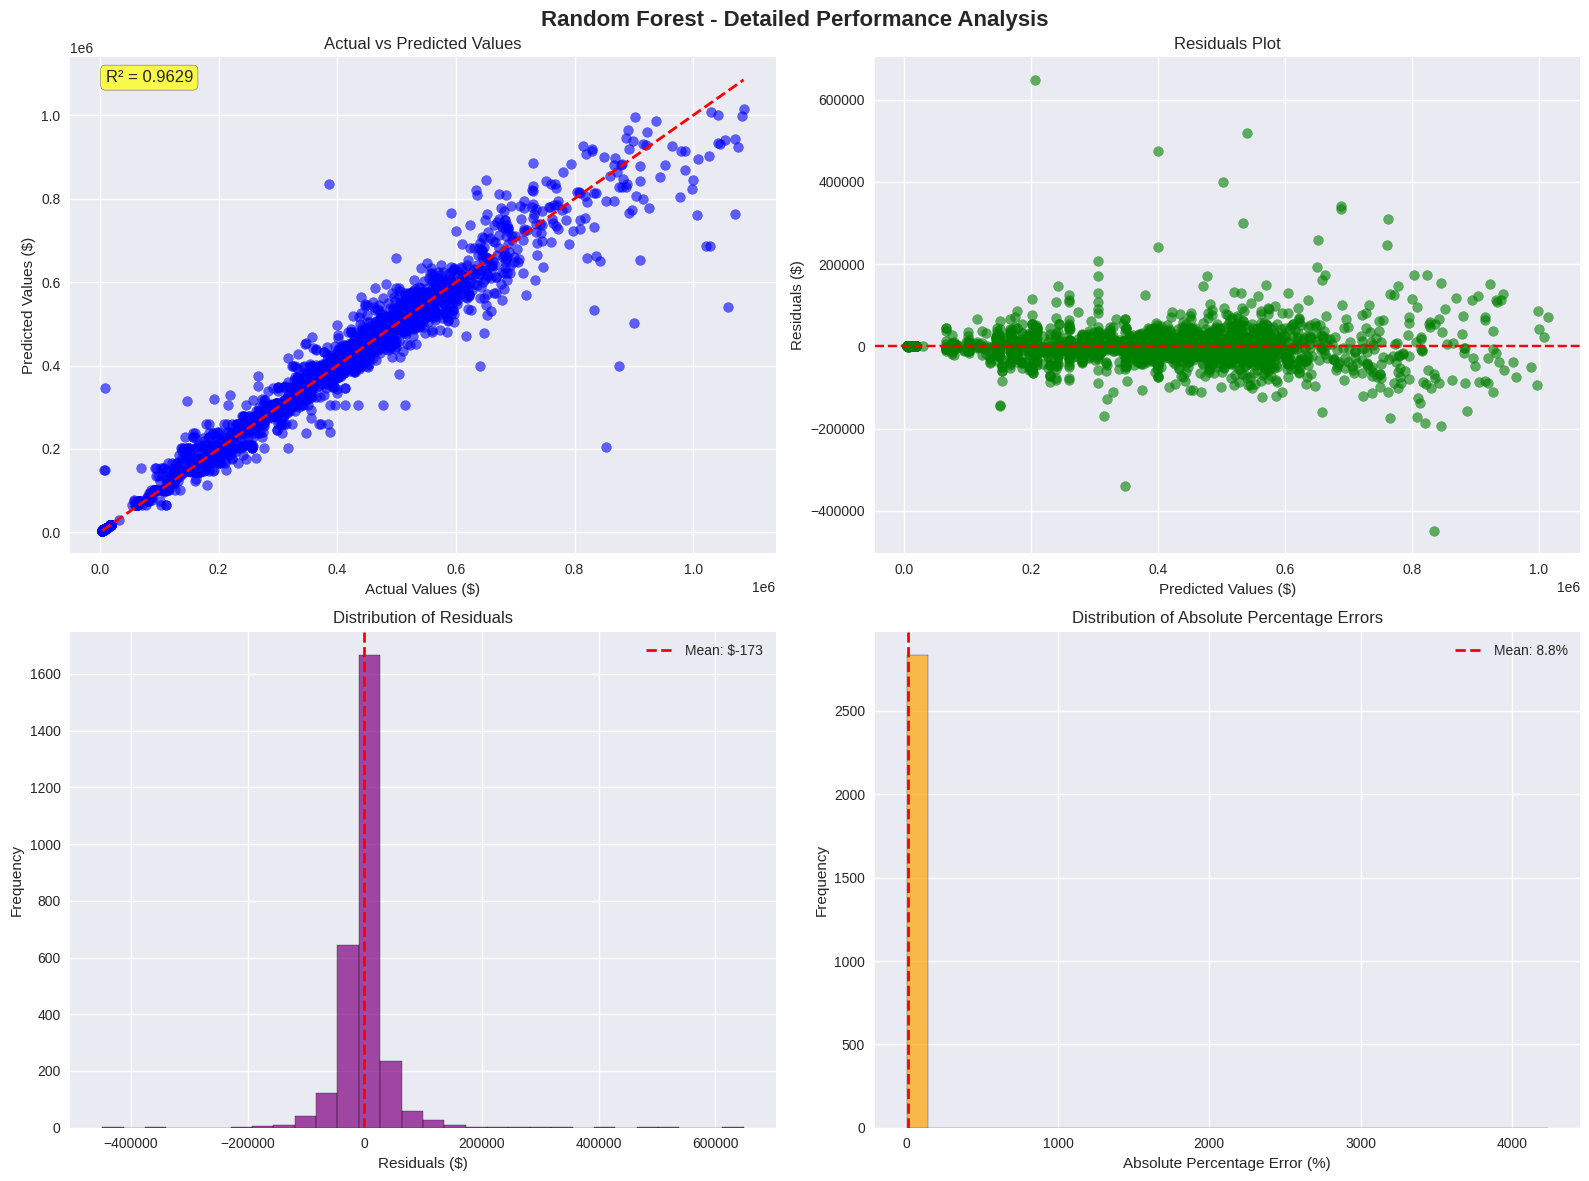

In [ ]:
# Create detailed prediction analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle(f'{best_model_name} - Detailed Performance Analysis', fontsize=16, fontweight='bold')

# 1. Actual vs Predicted Scatter Plot
ax1 = axes[0, 0]
ax1.scatter(y_test, best_predictions, alpha=0.6, color='blue', s=50)
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax1.set_xlabel('Actual Values ($)')
ax1.set_ylabel('Predicted Values ($)')
ax1.set_title('Actual vs Predicted Values')

# Add R² annotation
r2_text = f'R² = {results[best_model_name]["R2_Score"]:.4f}'
ax1.text(0.05, 0.95, r2_text, transform=ax1.transAxes, fontsize=12,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

# 2. Residuals Plot
ax2 = axes[0, 1]
residuals = y_test - best_predictions
ax2.scatter(best_predictions, residuals, alpha=0.6, color='green', s=50)
ax2.axhline(y=0, color='r', linestyle='--')
ax2.set_xlabel('Predicted Values ($)')
ax2.set_ylabel('Residuals ($)')
ax2.set_title('Residuals Plot')

# 3. Error Distribution
ax3 = axes[1, 0]
ax3.hist(residuals, bins=30, alpha=0.7, color='purple', edgecolor='black')
ax3.set_xlabel('Residuals ($)')
ax3.set_ylabel('Frequency')
ax3.set_title('Distribution of Residuals')
ax3.axvline(residuals.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: ${residuals.mean():,.0f}')
ax3.legend()

# 4. Percentage Error Distribution
ax4 = axes[1, 1]
percentage_errors = np.abs((y_test - best_predictions) / y_test) * 100
ax4.hist(percentage_errors, bins=30, alpha=0.7, color='orange', edgecolor='black')
ax4.set_xlabel('Absolute Percentage Error (%)')
ax4.set_ylabel('Frequency')
ax4.set_title('Distribution of Absolute Percentage Errors')
ax4.axvline(percentage_errors.mean(), color='red', linestyle='--', linewidth=2,
           label=f'Mean: {percentage_errors.mean():.1f}%')
ax4.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Create a comprehensive summary table
print("\n" + "="*80)
print("📊 COMPREHENSIVE MODEL PERFORMANCE SUMMARY")
print("="*80)

summary_df = pd.DataFrame(results).T
summary_df = summary_df.round(4)

# Add rankings
for metric in ['R2_Score']:
    summary_df[f'{metric}_Rank'] = summary_df[metric].rank(ascending=False).astype(int)

for metric in ['MAE', 'RMSE', 'MAPE']:
    summary_df[f'{metric}_Rank'] = summary_df[metric].rank(ascending=True).astype(int)

# Display formatted table
print(f"{'Model':<18} {'R²':<8} {'MAE ($)':<12} {'RMSE ($)':<12} {'MAPE (%)':<10} {'Overall Rank'}")
print("-" * 80)

for model_name in summary_df.index:
    r2 = summary_df.loc[model_name, 'R2_Score']
    mae = summary_df.loc[model_name, 'MAE']
    rmse = summary_df.loc[model_name, 'RMSE']
    mape = summary_df.loc[model_name, 'MAPE']

    # Calculate overall rank (average of individual ranks)
    overall_rank = (summary_df.loc[model_name, 'R2_Score_Rank'] +
                   summary_df.loc[model_name, 'MAE_Rank'] +
                   summary_df.loc[model_name, 'RMSE_Rank'] +
                   summary_df.loc[model_name, 'MAPE_Rank']) / 4

    print(f"{model_name:<18} {r2:<8.4f} ${mae:<11,.0f} ${rmse:<11,.0f} {mape:<9.1f}% {overall_rank:<.1f}")

print("="*80)


📊 COMPREHENSIVE MODEL PERFORMANCE SUMMARY
Model              R²       MAE ($)      RMSE ($)     MAPE (%)   Overall Rank
--------------------------------------------------------------------------------
Random Forest      0.9629   $21,995      $42,907      8.8      % 1.0
Gradient Boosting  0.9551   $29,714      $47,247      19.2     % 2.5
Linear Regression  0.8375   $59,265      $89,846      76.9     % 4.0
Ridge Regression   0.8351   $59,573      $90,509      77.2     % 6.0
Lasso Regression   0.8373   $59,304      $89,917      77.1     % 5.0
Decision Tree      0.9521   $26,130      $48,766      9.6      % 2.5
SVR                -0.0191  $180,879     $225,032     765.4    % 7.0


In [ ]:
# Calculate business impact
print("\n💼 BUSINESS VALUE ANALYSIS")
print("="*50)

avg_property_value = y_test.mean()
mae_best = results[best_model_name]['MAE']
mape_best = results[best_model_name]['MAPE']

print(f"Average Property Value: ${avg_property_value:,.0f}")
print(f"Model Accuracy (MAE): ${mae_best:,.0f}")
print(f"Accuracy as % of Avg Value: {(mae_best/avg_property_value)*100:.2f}%")
print(f"Model MAPE: {mape_best:.2f}%")

# Accuracy tiers
accuracy_within_5_percent = (percentage_errors <= 5).sum() / len(percentage_errors) * 100
accuracy_within_10_percent = (percentage_errors <= 10).sum() / len(percentage_errors) * 100
accuracy_within_15_percent = (percentage_errors <= 15).sum() / len(percentage_errors) * 100

print(f"\n🎯 PREDICTION ACCURACY TIERS:")
print(f"Within 5% of actual value: {accuracy_within_5_percent:.1f}% of predictions")
print(f"Within 10% of actual value: {accuracy_within_10_percent:.1f}% of predictions")
print(f"Within 15% of actual value: {accuracy_within_15_percent:.1f}% of predictions")


💼 BUSINESS VALUE ANALYSIS
Average Property Value: $348,525
Model Accuracy (MAE): $21,995
Accuracy as % of Avg Value: 6.31%
Model MAPE: 8.77%

🎯 PREDICTION ACCURACY TIERS:
Within 5% of actual value: 64.0% of predictions
Within 10% of actual value: 82.9% of predictions
Within 15% of actual value: 90.8% of predictions


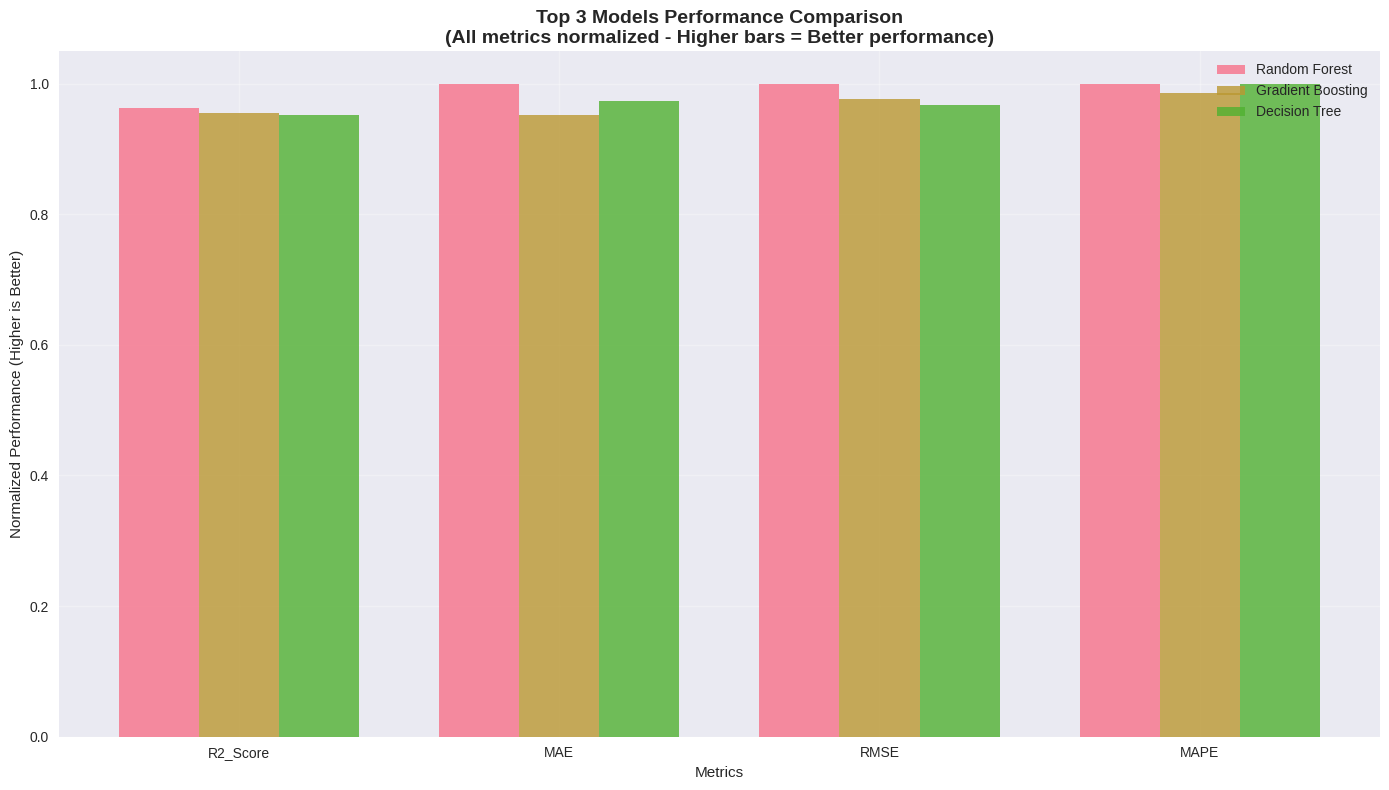


🎉 ANALYSIS COMPLETE!
Best Model: Random Forest
Dataset Size: 14,177 properties
Features Used: 122 features
Model Accuracy: 96.3%
Average Prediction Error: $21,995


In [ ]:
# Create a final showcase visualization
fig, ax = plt.subplots(1, 1, figsize=(14, 8))

# Create a radar chart style comparison for top 3 models
top_3_models = summary_df.nlargest(3, 'R2_Score')

metrics = ['R2_Score', 'MAE', 'RMSE', 'MAPE']
normalized_data = []

for model in top_3_models.index:
    model_data = []
    for metric in metrics:
        if metric == 'R2_Score':
            # For R2, higher is better, so we use the value as is
            normalized_value = top_3_models.loc[model, metric]
        else:
            # For MAE, RMSE, MAPE, lower is better, so we invert them
            max_val = summary_df[metric].max()
            min_val = summary_df[metric].min()
            normalized_value = 1 - (top_3_models.loc[model, metric] - min_val) / (max_val - min_val)
        model_data.append(normalized_value)
    normalized_data.append(model_data)

# Create bar plot showing model comparison
x = np.arange(len(metrics))
width = 0.25

for i, (model, data) in enumerate(zip(top_3_models.index, normalized_data)):
    ax.bar(x + i*width, data, width, label=model, alpha=0.8)

ax.set_xlabel('Metrics')
ax.set_ylabel('Normalized Performance (Higher is Better)')
ax.set_title('Top 3 Models Performance Comparison\n(All metrics normalized - Higher bars = Better performance)',
             fontweight='bold', fontsize=14)
ax.set_xticks(x + width)
ax.set_xticklabels(metrics)
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n🎉 ANALYSIS COMPLETE!")
print("="*50)
print(f"Best Model: {best_model_name}")
print(f"Dataset Size: {len(df):,} properties")
print(f"Features Used: {len(X_train.columns)} features")
print(f"Model Accuracy: {results[best_model_name]['R2_Score']:.1%}")
print(f"Average Prediction Error: ${results[best_model_name]['MAE']:,.0f}")